In [1]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


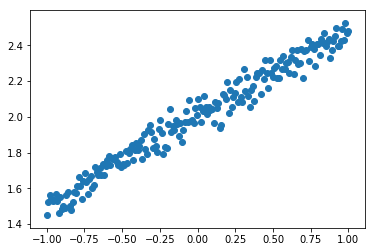

In [2]:
X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
plt.scatter(X, Y)
plt.show()

In [3]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

In [4]:
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(loss='mse', optimizer='sgd')

In [5]:
print('Training-----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost:', cost)

Training-----------
train cost: 4.0225005
train cost: 0.073238626
train cost: 0.00386274
train cost: 0.002643449


In [6]:
print('Testing------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b= model.layers[0].get_weights()
print('Weights=', W, '\nbiases=',b)

Testing------------
40/40 [==============================] - 0s 556us/step
test cost: 0.0031367032788693905
Weights= [[0.4922711]] 
biases= [1.9995022]


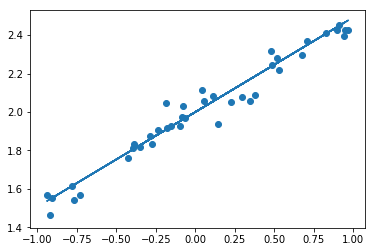

In [7]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()